# Analyse décès sur le territoire Français

Une analyse des impacts globaux du covid en s'abstrayant des biais de tests

In [3]:
# Generic imports
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date

## data crunching

In [4]:
# Data from insee
# https://insee.fr/fr/statistiques/4487988?sommaire=4487854 
insee_file = "2020-09-18_deces_quotidiens_departement_csv.csv"
df_insee = pd.read_csv("./Data_FR_Deaths/" + insee_file, delimiter=";", index_col="Date_evenement")
df_insee

,Zone,Communes_a_envoi_dematerialise_Deces2020,Total_deces_2020,Communes_a_envoi_dematerialise_Deces2019,Total_deces_2019,Communes_a_envoi_dematerialise_Deces2018,Total_deces_2018
Date_evenement,,,,,,,
01-mars,France,1628.0,1782.0,1708,1872,1927,2136
02-mars,France,3268.0,3567.0,3467,3782,3932,4327
03-mars,France,4905.0,5340.0,5035,5530,5880,6455
04-mars,France,6592.0,7155.0,6747,7410,7767,8545
05-mars,France,8222.0,8935.0,8455,9278,9769,10746
...,...,...,...,...,...,...,...
26-sept.,Dept_976,NaN,NaN,438,438,396,396
27-sept.,Dept_976,NaN,NaN,439,439,400,400
28-sept.,Dept_976,NaN,NaN,440,440,402,402


In [5]:
# change in date format 
df_insee.reset_index(inplace=True)
type(df_insee['Date_evenement'])
df_insee['Date_evenement'].replace(to_replace ='-mars', value = '/03/2020', regex = True, inplace=True)
df_insee['Date_evenement'].replace(to_replace ='-avr', value = '/04/2020', regex = True, inplace=True)
df_insee['Date_evenement'].replace(to_replace ='-mai', value = '/05/2020', regex = True, inplace=True)
df_insee['Date_evenement'].replace(to_replace ='-juin', value = '/06/2020', regex = True, inplace=True)
df_insee['Date_evenement'].replace(to_replace ='-juil', value = '/07/2020', regex = True, inplace=True)
df_insee['Date_evenement'].replace(to_replace ='-août', value = '/08/2020', regex = True, inplace=True)
df_insee['Date_evenement'].replace(to_replace ='-sept', value = '/09/2020', regex = True, inplace=True)
df_insee['Date_evenement'].replace(to_replace ='-oct', value = '/10/2020', regex = True, inplace=True)
df_insee['Date_evenement'].replace(to_replace ='-nov', value = '/11/2020', regex = True, inplace=True)
df_insee['Date_evenement'].replace(to_replace ='-dec', value = '/12/2020', regex = True, inplace=True)
df_insee.set_index('Date_evenement', inplace=True)

### Vérification de l'intégrité des sommes

In [6]:
df_insee

,Zone,Communes_a_envoi_dematerialise_Deces2020,Total_deces_2020,Communes_a_envoi_dematerialise_Deces2019,Total_deces_2019,Communes_a_envoi_dematerialise_Deces2018,Total_deces_2018
Date_evenement,,,,,,,
01/03/2020,France,1628.0,1782.0,1708,1872,1927,2136
02/03/2020,France,3268.0,3567.0,3467,3782,3932,4327
03/03/2020,France,4905.0,5340.0,5035,5530,5880,6455
04/03/2020,France,6592.0,7155.0,6747,7410,7767,8545
05/03/2020,France,8222.0,8935.0,8455,9278,9769,10746
...,...,...,...,...,...,...,...
26/09/2020.,Dept_976,NaN,NaN,438,438,396,396
27/09/2020.,Dept_976,NaN,NaN,439,439,400,400
28/09/2020.,Dept_976,NaN,NaN,440,440,402,402


In [7]:
check = df_insee[df_insee.loc[:,"Zone"]=="France"]

In [8]:
check_2 = df_insee[df_insee.loc[:,"Zone"]!="France"].groupby('Date_evenement').sum()

In [9]:
check_2

,Communes_a_envoi_dematerialise_Deces2020,Total_deces_2020,Communes_a_envoi_dematerialise_Deces2019,Total_deces_2019,Communes_a_envoi_dematerialise_Deces2018,Total_deces_2018
Date_evenement,,,,,,
01/03/2020,1628.0,1782.0,1708,1872,1927,2136
01/04/2020.,60604.0,65885.0,50490,55325,56558,62192
01/05/2020,120592.0,131518.0,95440,104453,102236,112328
01/06/2020,165010.0,180566.0,140342,153471,146003,160179
01/07/2020.,206856.0,226735.0,182991,200028,187324,205470
...,...,...,...,...,...,...
30/09/2020.,0.0,0.0,310508,339766,314692,345140
31/03/2020,58026.0,63077.0,48938,53636,54964,60410
31/05/2020,163663.0,179044.0,138887,151897,144635,158703


In [10]:
check_3 = check.join(check_2, rsuffix="_sum",)[["Total_deces_2020","Total_deces_2019","Total_deces_2018", "Total_deces_2020_sum","Total_deces_2019_sum","Total_deces_2018_sum"]]

In [11]:
(check_3["Total_deces_2020"]-check_3["Total_deces_2020_sum"]).describe()

count    191.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
dtype: float64

In [12]:
(check_3["Total_deces_2019"]-check_3["Total_deces_2019_sum"]).describe()

count    214.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
dtype: float64

In [13]:
(check_3["Total_deces_2018"]-check_3["Total_deces_2018_sum"]).describe()

count    214.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
dtype: float64

### filtrage et reformation du df insee

In [14]:
df_insee = df_insee[df_insee["Zone"]=="France"][["Total_deces_2020"]]
df_insee

,Total_deces_2020
Date_evenement,
01/03/2020,1782.0
02/03/2020,3567.0
03/03/2020,5340.0
04/03/2020,7155.0
05/03/2020,8935.0
...,...
26/09/2020.,NaN
27/09/2020.,NaN
28/09/2020.,NaN


In [15]:
df_insee.columns=[2020]
df_insee.sort_index(axis=1,inplace=True)

In [16]:
# our main dataframe to compile all data 2020 and before 
df_wp = df_insee.diff()
df_wp.index = pd.to_datetime(df_wp.index, dayfirst=True)

In [17]:
# first date is unkown as diff cannot be applied on first element
df_wp.loc["2020/03/01",:]=df_insee.loc["01/03/2020",:]

In [18]:
df_wp

,2020
Date_evenement,
2020-03-01,1782.0
2020-03-02,1785.0
2020-03-03,1773.0
2020-03-04,1815.0
2020-03-05,1780.0
...,...
2020-09-26,NaN
2020-09-27,NaN
2020-09-28,NaN


## Données de références

In [19]:
# données historiques
df_histo_csv = pd.read_csv("./Data_FR_Deaths/" + 'histo_deces.csv', index_col = 0)
# remove badly formatted data and before 2000
df_histo_csv = df_histo_csv.filter(regex = '2[0-9]{3}\-[0-1][0-9]\-[0-3][0-9]', axis=0)
# transform index into dates
#df_histo_csv.index = pd.to_datetime(df_histo_csv.index, format = "%Y-%m-%d")
df_histo_csv.index = pd.DatetimeIndex(df_histo_csv.index)
# Add info for reference
df_histo_csv.reset_index(inplace=True)



In [20]:
df_histo_csv.sort_values(by="date_deces").tail()

,date_deces,nbr_deces
7390,2020-03-26,1647
7391,2020-03-27,1178
7392,2020-03-28,853
7393,2020-03-29,559
7394,2020-03-30,179


### Date for 2020 and references

In [21]:
import datetime
base = datetime.datetime.fromisoformat("2020-01-01")
date_list = [base + datetime.timedelta(days=x) for x in range(366)]

In [22]:
df_histo = pd.DataFrame(date_list)
df_histo.columns = ['date_ref']
df_histo['year'] = pd.DatetimeIndex(df_histo['date_ref']).year
df_histo['week'] = pd.DatetimeIndex(df_histo['date_ref']).weekofyear
df_histo['dow'] = pd.DatetimeIndex(df_histo['date_ref']).weekday  + 1
#df_histo['ref'] = df_histo['week'].astype('str') + "-" + df_histo['dow'].astype('str')
df_histo['ref'] = df_histo['date_ref'] 

In [23]:
lst_years = range(2019,1999,-1)

In [24]:
# Join the references same dow last year (-364d)
for x in lst_years:
    df_histo['ref'] = df_histo['ref'] - pd.Timedelta(days=364)
    df_histo = df_histo.join(df_histo_csv.set_index('date_deces'), on=['ref'],rsuffix='_'+str(x), how='left')


In [25]:
df_histo.drop(['year','week','dow','ref'], axis=1, inplace=True)
df_histo.set_index('date_ref',inplace=True)
df_histo.columns=lst_years

In [26]:
df_histo['max'] = df_histo.max(axis=1)
df_histo['min'] = df_histo.min(axis=1)

In [27]:
df_histo

,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,...,2007,2006,2005,2004,2003,2002,2001,2000,max,min
date_ref,,,,,,,,,,,,,,,,,,,,,
2020-01-01,1935,2137,2251,1799,1969,1686,1742,1686,1785,1796,...,1665,1665,1604,1702,1706,1830,1728,1886,2251,1604
2020-01-02,1880,2160,2271,1731,1920,1750,1868,1716,1691,1790,...,1539,1631,1625,1597,1677,1816,1585,1969,2271,1539
2020-01-03,1900,2102,2260,1721,1965,1699,1777,1692,1714,1728,...,1579,1602,1573,1561,1556,1856,1633,1979,2260,1556
2020-01-04,1921,2020,2239,1741,1936,1693,1793,1648,1725,1694,...,1600,1548,1668,1633,1632,1851,1625,1975,2239,1548
2020-01-05,1896,2008,2228,1745,1903,1562,1675,1642,1633,1577,...,1446,1599,1533,1541,1572,1788,1633,1995,2228,1446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,1715,1756,1973,2206,1726,1856,1618,1706,1713,1673,...,1682,1532,1594,1458,1448,1772,1872,1540,2206,1448
2020-12-28,1892,1890,2027,2371,1835,1978,1786,1787,1736,1759,...,1722,1658,1577,1652,1614,1851,1916,1764,2371,1577
2020-12-29,1800,1839,2142,2353,1778,1848,1781,1803,1776,1803,...,1803,1557,1734,1619,1675,1774,1852,1646,2353,1557


### Complement données début 2020 
Jan-Feb depuis historique

In [28]:
deb_2020 = pd.date_range("2020-01-01", "2020-02-29")

df_deb_2020 = df_histo_csv.set_index('date_deces').loc[deb_2020, :]
df_deb_2020.columns = [2020]
df_deb_2020.describe()

,2020
count,60.000000
mean,1811.566667
std,83.341317
min,1637.000000
25%,1754.000000
50%,1802.500000
75%,1866.500000
max,1996.000000


In [29]:
df_wp.describe
df_wp = df_wp.append(df_deb_2020)


In [30]:
df_wp= df_wp.sort_index()


## Comparaison décès par jour 2020 vs références

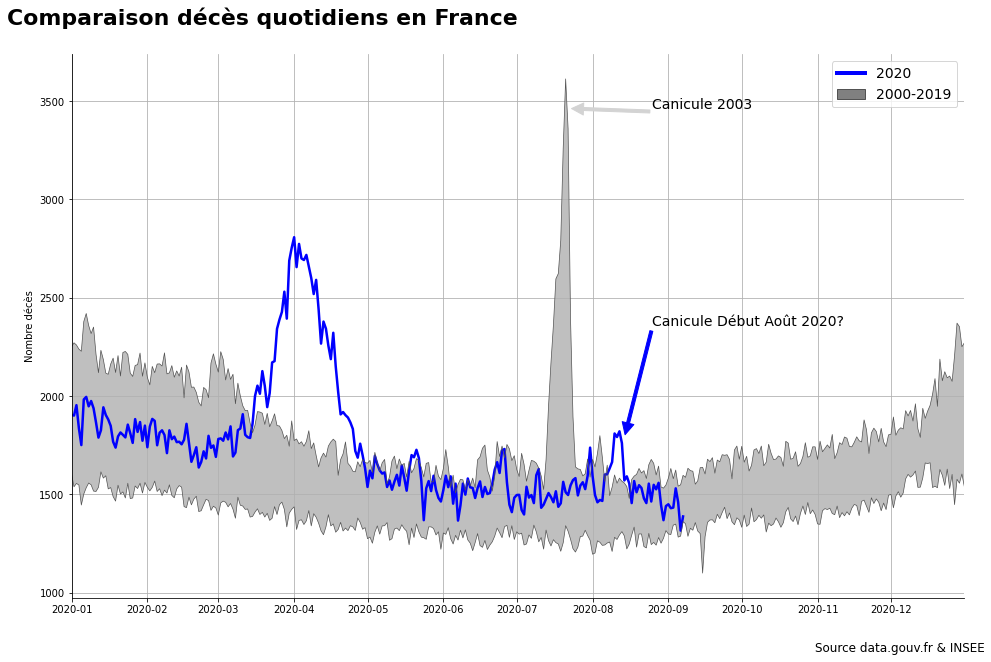

In [31]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

# Figure et axe principaux
# ########################
fig, ax = plt.subplots(figsize=(16,10))

# courbe 2020

ax.plot(df_wp, label='2020', linewidth=2.5, color='blue')


# defining area of reference
# ##########################

# Boundaries
ax.plot(df_histo[['min','max']], label='2000-2019', color="#525252",linewidth=0.7 )
# fill
ax.fill_between(date_list, df_histo['min'], df_histo['max'], facecolor='grey', alpha=0.5)


# layout
ax.set_title("Comparaison décès quotidiens en France", fontsize=22, pad=30, fontweight = 'bold',horizontalalignment='right')
#ax.set_xlabel("date du jour")
ax.set_ylabel("Nombre décès")
ax.grid(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.margins(0.05)
ax.set_xlim([pd.to_datetime('2020-01-01'),pd.to_datetime('2020-12-31')])

# define legend
# #############
legend_elements = [Line2D([0], [0], color='blue', lw=4, label='2020'),
                   Patch(facecolor='grey', edgecolor='#525252',
                         label='2000-2019')]
ax.legend(handles=legend_elements, fontsize=14)

fig.text(0.77, 0.05, "Source data.gouv.fr & INSEE", fontsize=12)


# Commentaires
ax.annotate("Canicule 2003", xy=(0.56, 0.9), xytext=(0.65, 0.9), xycoords = "axes fraction",
            arrowprops={"width":3,"edgecolor":"lightgrey", "facecolor":"lightgrey"}, fontsize=14, )


ax.annotate("Canicule Début Août 2020?", xy=(0.62, 0.3), xytext=(0.65, 0.5), xycoords = "axes fraction",
            arrowprops={"width":3, "edgecolor":"blue", "facecolor":"blue"}, fontsize=14)

#arrowprops=dict(arrowstyle="->", width=4)
fig.savefig("deces_fr-"+ str(date.today()) +".png")


# Cumul des décès cumulés

In [108]:
# Calculs des cumuls

data_cum_2020 = df_wp.cumsum()
data_cum_2000_2019 = df_histo.mean(axis=1).cumsum()

augmentation_cum = data_cum_2020.max().values[0] / data_cum_2000_2019[data_cum_2020.idxmax()].values[0] - 1

share_of_year = (data_cum_2020.idxmax() - pd.to_datetime("2020-01-01")).dt.days.values[0]/365 
share_of_year

0.684931506849315

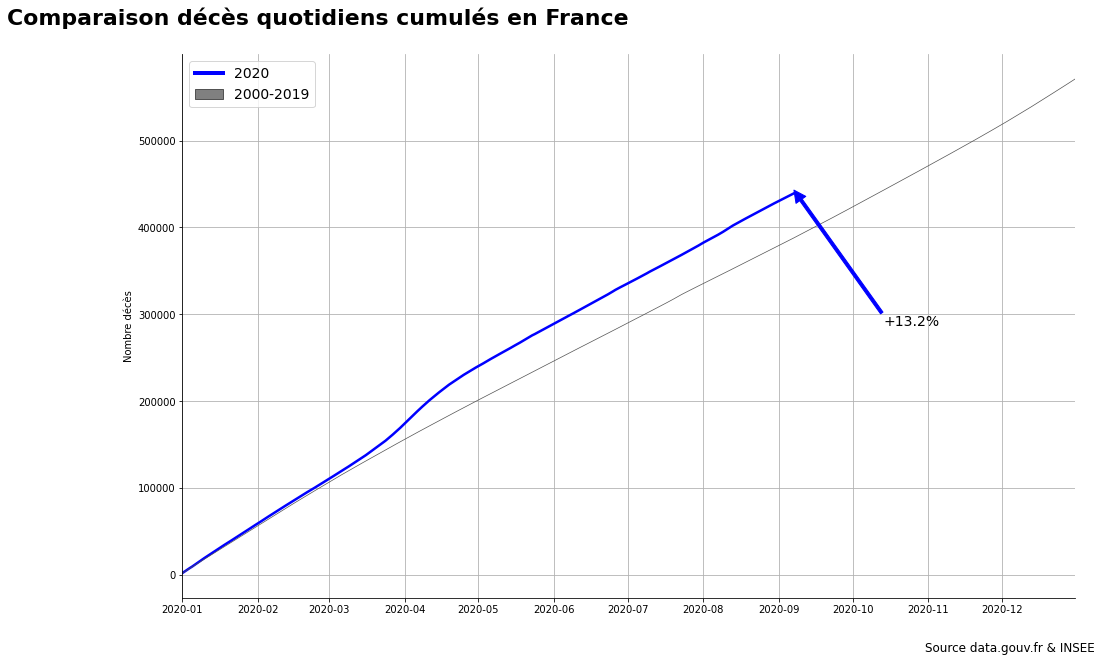

In [114]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

# Figure et axe principaux
# ########################
fig_cum, ax_cum = plt.subplots(figsize=(16,10))

# courbe 2020

ax_cum.plot(data_cum_2020, label='2020', linewidth=2.5, color='blue')


# courbe 2000-2019
ax_cum.plot(data_cum_2000_2019, label='2000-2019', color="#525252",linewidth=0.7 )



# layout
ax_cum.set_title("Comparaison décès quotidiens cumulés en France", fontsize=22, pad=30, fontweight = 'bold',horizontalalignment='right')
#ax.set_xlabel("date du jour")
ax_cum.set_ylabel("Nombre décès")
ax_cum.grid(True)
ax_cum.spines['top'].set_visible(False)
ax_cum.spines['right'].set_visible(False)
ax_cum.margins(0.05)
ax_cum.set_xlim([pd.to_datetime('2020-01-01'),pd.to_datetime('2020-12-31')])

# define legend
# #############
legend_elements = [Line2D([0], [0], color='blue', lw=4, label='2020'),
                   Patch(facecolor='grey', edgecolor='#525252',
                         label='2000-2019')]
ax_cum.legend(handles=legend_elements, fontsize=14)

fig_cum.text(0.77, 0.05, "Source data.gouv.fr & INSEE", fontsize=12)


# Commentaires



ax_cum.annotate(f"{augmentation_cum*100:+.1f}%", xy=(share_of_year, 0.75), xytext=(max(min(share_of_year+0.1,0.8),0.2), 0.5), xycoords = "axes fraction",
            arrowprops={"width":3, "edgecolor":"blue", "facecolor":"blue"}, fontsize=14)

#arrowprops=dict(arrowstyle="->", width=4)
fig.savefig("deces_cum_fr-"+ str(date.today()) +".png")


In [64]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [49]:
df_wp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 274 entries, 2020-01-01 to 2020-09-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2020    237 non-null    float64
dtypes: float64(1)
memory usage: 4.3 KB


In [57]:
data_cum_2000_2019[data_cum_2020.idxmax()].values[0]

387977.04545454565